In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [2]:
files = glob.glob('../Output/RP/*.csv')
files.sort()

In [3]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/RP/BreastC Silhouette.csv',
 1: '../Output/RP/BreastC acc.csv',
 2: '../Output/RP/BreastC adjMI.csv',
 3: '../Output/RP/BreastC2D.csv',
 4: '../Output/RP/Faults Silhouette.csv',
 5: '../Output/RP/Faults acc.csv',
 6: '../Output/RP/Faults adjMI.csv',
 7: '../Output/RP/Faults2D.csv',
 8: '../Output/RP/SSE.csv',
 9: '../Output/RP/logliklihood.csv'}

In [4]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[8]**

GMM Loglikelihood - Both datasets:  **dfs[9]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

Visualize dataset in 2D - Breast C:  **dfs[3]**

Silhouette - Faults:  **dfs[4]** 

acc - Faults:  **dfs[5]**

adjMI - Faults:  **dfs[6]**

Visualize dataset in 2D - Faults:  **dfs[7]**

In [5]:
km_SSE = dfs[8]
gmm_log = dfs[9]
bc_ss = dfs[0].T[1:]
bc_acc = dfs[1].T[1:]
bc_adjMI = dfs[2].T[1:]
bc_2d = dfs[3]

f_ss = dfs[4].T[1:]
f_acc = dfs[5].T[1:]
f_adjMI = dfs[6].T[1:]
f_2d = dfs[7]

# Choosing K
## K-Means SSE: (Breast Cancer & Faulty Plates)

In [6]:
km_SSE.columns = ['clusters','bc_sse','fp_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
f_y = km_SSE['fp_sse']
km_SSE.head()

,clusters,bc_sse,fp_sse
0,2,2255.623589,8164.441768
1,3,1849.888557,6769.867325
2,4,1624.848142,5489.627942
3,5,1384.649833,4551.912688
4,6,1249.099699,4104.793993


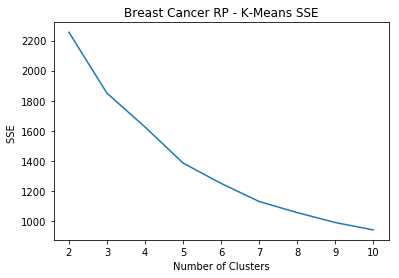

In [7]:
plt.plot(x,bc_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - K-Means SSE')
plt.show()

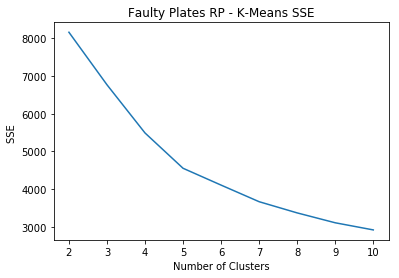

In [8]:
plt.plot(x,f_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RP - K-Means SSE')
plt.show()

## EM Log-Likelihood: (Breast Cancer & Faulty Plates)

In [9]:
gmm_log.columns = ['clusters','bc_log','fp_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
f_y = gmm_log['fp_log']
gmm_log.head()

,clusters,bc_log,fp_log
0,2,-6.547695,-7.382298
1,3,-6.221111,-6.542653
2,4,-6.058377,-5.779116
3,5,-5.979917,-5.576116
4,6,-5.825226,-5.389777


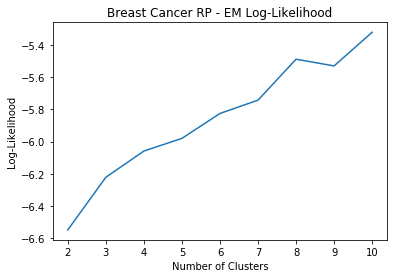

In [10]:
plt.plot(x,bc_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - EM Log-Likelihood')
plt.show()

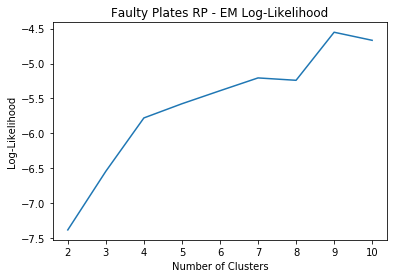

In [11]:
plt.plot(x,f_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RP - EM Log-Likelihood')
plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [12]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.335948,0.371441,2
3,0.182212,0.34412,3
4,0.175551,0.248099,4
5,0.187323,0.265162,5
6,0.16134,0.209522,6


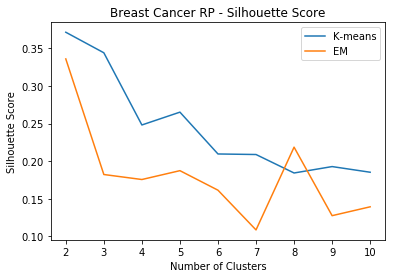

In [13]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [14]:
bc_acc['clusters'] = bc_acc.index
bc_acc.columns = ['gmm_acc','km_acc','clusters']
x = bc_acc['clusters']
gmm_y = bc_acc['gmm_acc']
km_y = bc_acc['km_acc']
bc_acc.head()

,gmm_acc,km_acc,clusters
2,0.841758,0.850549,2
3,0.791209,0.846154,3
4,0.905495,0.813187,4
5,0.898901,0.813187,5
6,0.835165,0.832967,6


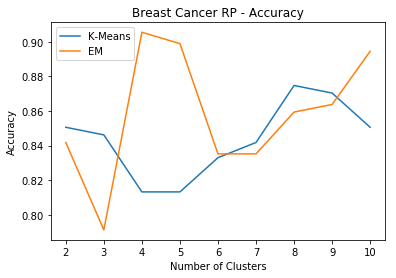

In [15]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [16]:
bc_adjMI['clusters'] = bc_adjMI.index
bc_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = bc_adjMI['clusters']
gmm_y = bc_adjMI['gmm_adjMI']
km_y = bc_adjMI['km_adjMI']

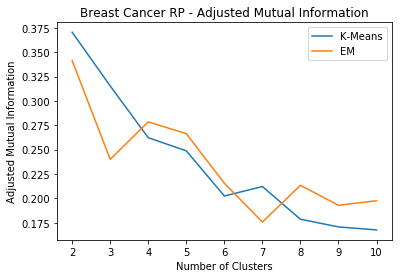

In [17]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - Adjusted Mutual Information')
plt.legend()
plt.show()

# Faulty Plates Dataset

## Silhouette Score: K-Means and EM

In [18]:
f_ss['clusters'] = bc_ss.index
f_ss.columns = ['gmm_ss','km_ss','clusters']
x = f_ss['clusters']
gmm_y = f_ss['gmm_ss']
km_y = f_ss['km_ss']
f_ss.head()

,gmm_ss,km_ss,clusters
2,0.285574,0.277243,2
3,0.234126,0.285928,3
4,0.223857,0.254913,4
5,0.200562,0.267329,5
6,0.236955,0.2699,6


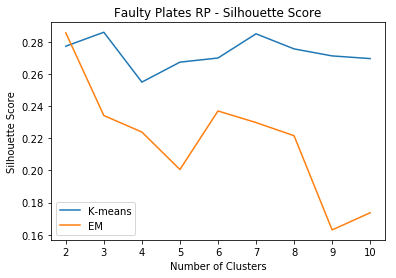

In [19]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RP - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [20]:
f_acc['clusters'] = f_acc.index
f_acc.columns = ['gmm_acc','km_acc','clusters']
x = f_acc['clusters']
gmm_y = f_acc['gmm_acc']
km_y = f_acc['km_acc']
f_acc.head()

,gmm_acc,km_acc,clusters
2,0.485825,0.447165,2
3,0.487758,0.45232,3
4,0.494845,0.487758,4
5,0.49549,0.524485,5
6,0.534149,0.528995,6


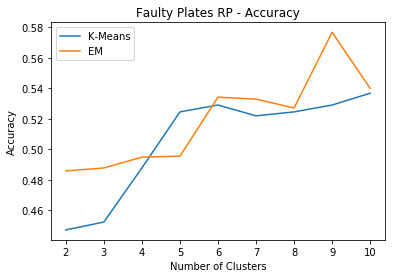

In [21]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RP - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [22]:
f_adjMI['clusters'] = f_adjMI.index
f_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = f_adjMI['clusters']
gmm_y = f_adjMI['gmm_adjMI']
km_y = f_adjMI['km_adjMI']

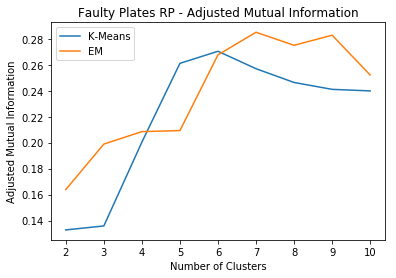

In [23]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RP - Adjusted Mutual Information')
plt.legend()
plt.show()

## 2D Visualizaion

In [24]:
f_2d.columns = ['data','x','y','target']
f_2d.head()

,data,x,y,target
0,0,10.145571,4.704357,Dirtiness
1,1,12.124450,8.935789,Bumps
2,2,3.548084,13.550025,Dirtiness
3,3,-0.418051,-4.475494,Other_Faults
4,4,2.127702,-12.029487,Stains


## RP Analyses: Pariwise Distance Correlation and Reconstruction Error

In [25]:
files1 = glob.glob('../Output/RP/RP/*1.csv')
files1.sort()
files2 = glob.glob('../Output/RP/RP/*2.csv')
files2.sort()

In [26]:
files1 = dict(enumerate(files1))
files1

{0: '../Output/RP/RP/bc scree1.csv', 1: '../Output/RP/RP/faults scree1.csv'}

In [27]:
files2 = dict(enumerate(files2))
files2

{0: '../Output/RP/RP/bc scree2.csv', 1: '../Output/RP/RP/faults scree2.csv'}

In [28]:
dfs1 = defaultdict(int)
for indx, f in files1.items():
    dfs1[indx] = pd.read_csv(f)
    
dfs2 = defaultdict(int)
for indx, f in files2.items():
    dfs2[indx] = pd.read_csv(f)

In [29]:
bc_cor = dfs1[0]
bc_cor["avg_corr"] = dfs1[0].iloc[:,1:11].mean(axis=1)
bc_cor.rename(columns={bc_cor.columns[0]: "components" },inplace=True)
bc_cor[:1]

,components,0,1,2,3,4,5,6,7,8,9,avg_corr
0,2,0.517038,0.722156,0.778437,0.761988,0.774395,0.698166,0.601837,0.589125,0.487414,0.632175,0.656273


In [30]:
bc_rer = dfs2[0]
bc_rer["avg_rerror"] = dfs2[0].iloc[:,1:11].mean(axis=1)
bc_rer.rename(columns={bc_rer.columns[0]: "components" },inplace=True)
bc_rer[:1]

,components,0,1,2,3,4,5,6,7,8,9,avg_rerror
0,2,0.959267,0.837987,0.895503,0.89497,0.920468,0.92835,0.965863,0.969076,0.963287,0.921931,0.92567


In [31]:
f_cor = dfs1[1]
f_cor["avg_corr"] = dfs1[1].iloc[:,1:11].mean(axis=1)
f_cor.rename(columns={f_cor.columns[0]: "components" },inplace=True)
f_cor[:1]

,components,0,1,2,3,4,5,6,7,8,9,avg_corr
0,2,0.687402,0.50983,0.281816,0.35166,0.351943,0.397268,0.7979,0.638073,0.552253,0.704864,0.527301


In [32]:
f_rer = dfs2[1]
f_rer["avg_rerror"] = dfs2[1].iloc[:,1:11].mean(axis=1)
f_rer.rename(columns={f_rer.columns[0]: "components" },inplace=True)
f_rer[:1]

,components,0,1,2,3,4,5,6,7,8,9,avg_rerror
0,2,0.925253,0.902411,0.932735,0.933638,0.947364,0.940614,0.902192,0.923643,0.943367,0.944014,0.929523


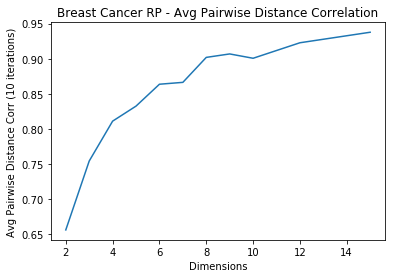

In [33]:
x = bc_cor["components"]
y = bc_cor["avg_corr"]
plt.plot(x,y)
plt.ylabel("Avg Pairwise Distance Corr (10 iterations)")
plt.xlabel("Dimensions")
plt.title('Breast Cancer RP - Avg Pairwise Distance Correlation')
plt.show()

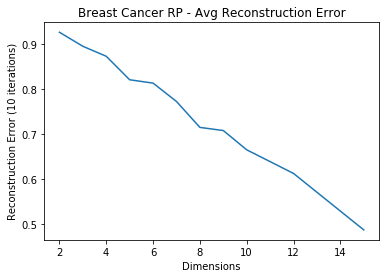

In [34]:
x = bc_rer["components"]
y = bc_rer["avg_rerror"]
plt.plot(x,y)
plt.ylabel("Reconstruction Error (10 iterations)")
plt.xlabel("Dimensions")
plt.title('Breast Cancer RP - Avg Reconstruction Error')
plt.show()

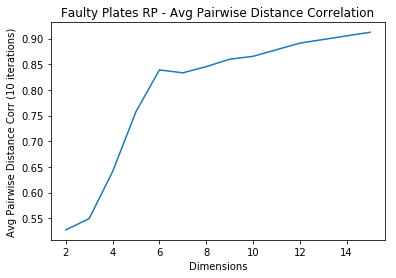

In [35]:
x = f_cor["components"]
y = f_cor["avg_corr"]
plt.plot(x,y)
plt.ylabel("Avg Pairwise Distance Corr (10 iterations)")
plt.xlabel("Dimensions")
plt.title('Faulty Plates RP - Avg Pairwise Distance Correlation')
plt.show()

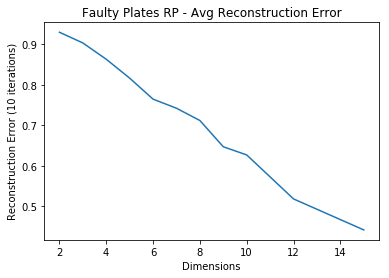

In [36]:
x = f_rer["components"]
y = f_rer["avg_rerror"]
plt.plot(x,y)
plt.ylabel("Reconstruction Error (10 iterations)")
plt.xlabel("Dimensions")
plt.title('Faulty Plates RP - Avg Reconstruction Error')
plt.show()